In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# 1. Завантажити дані та вивести перших 5 рядків
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("Завдання 1: Перші 5 рядків даних")
print(df.head(5))

Завдання 1: Перші 5 рядків даних
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
# 2. Перевірити наявність пропусків і замінити на середнє значення
print("\nЗавдання 2: Перевірка на наявність пропусків")
print(df.isnull().sum())


Завдання 2: Перевірка на наявність пропусків
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [4]:
# 3. Перевірити наявність дублікатів, при виявленні – видалити
print("\nЗавдання 3: Перевірка на наявність дублікатів")
print(df.duplicated().sum())



Завдання 3: Перевірка на наявність дублікатів
0


In [5]:
# 4. Замінити бінарні ознаки (наприклад, стать)
# (Дані не мають стовпця 'sex', тож пропустимо це завдання)
# print("Завдання 4: Унікальні значення для 'sex':", df['sex'].unique())



Завдання 5: Типи даних
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Завдання 6: Кореляція між ознаками
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


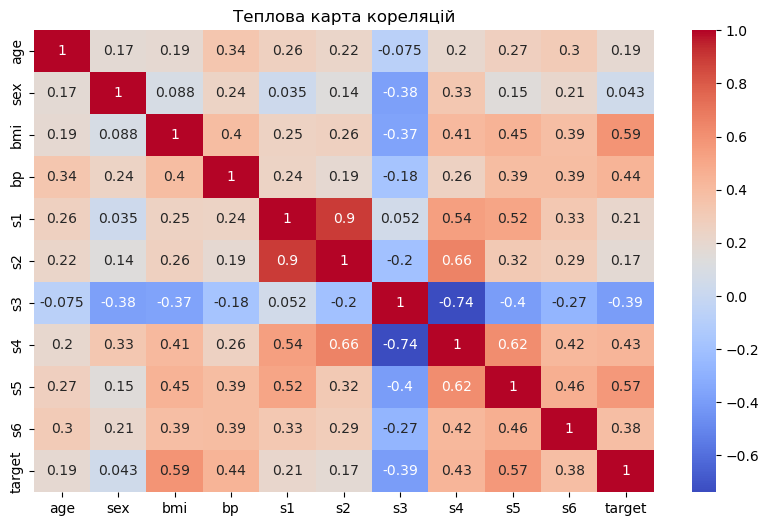

In [6]:
# 5. Перевірити тип даних
print("\nЗавдання 5: Типи даних")
print(df.dtypes)

# 6. Обчислити кореляцію між ознаками і прогресом діабету, побудувати теплову карту
print("\nЗавдання 6: Кореляція між ознаками")
correlation = df.corr()['target'].sort_values(ascending=False)
print(correlation)

# Теплова карта кореляції
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Теплова карта кореляцій")
plt.show()

In [7]:
# 7. Масштабувати ознаки
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('target', axis=1)), columns=df.columns[:-1])

# 8. Поділити дані на тренувальну і тестову вибірки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Побудувати модель лінійної регресії і RandomForest регресії на основі найбільш корелюючих ознак
top_features = correlation.index[1:6]  # Вибір топ-5 ознак
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [8]:
# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train_top, y_train)
y_pred_lr = linear_model.predict(X_test_top)

# RandomForest регресія
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_top, y_train)
y_pred_rf = rf.predict(X_test_top)


In [9]:
# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку
print("\nЗавдання 10: Оцінки моделей")
print("Linear Regression:")
print(f"R^2: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")

print("\nRandomForest Regression:")
print(f"R^2: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")


Завдання 10: Оцінки моделей
Linear Regression:
R^2: 0.45
MSE: 2899.74

RandomForest Regression:
R^2: 0.42
MSE: 3048.31


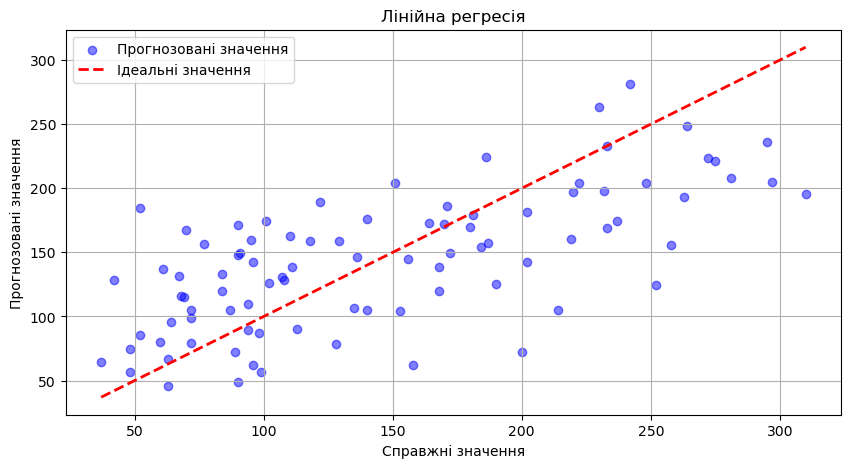

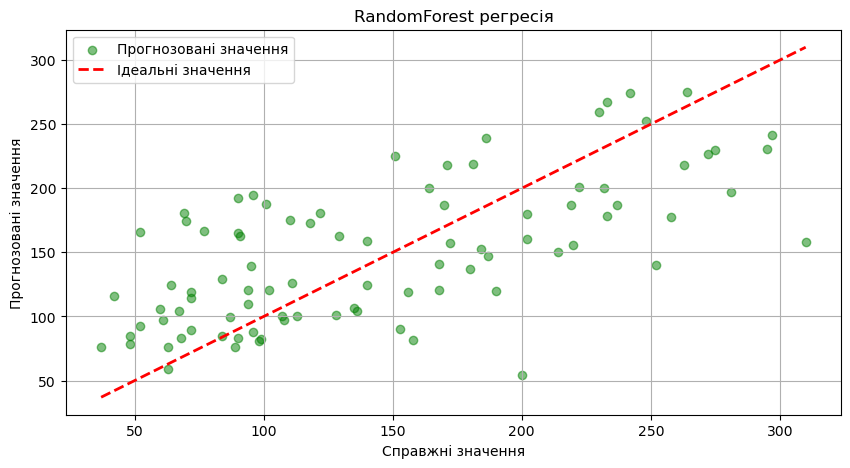

In [10]:
# 11. Побудувати графіки для обох моделей
# Графік для лінійної регресії
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ідеальні значення')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія")
plt.legend()
plt.grid(True)
plt.show()

# Графік для RandomForest регресії
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ідеальні значення')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("RandomForest регресія")
plt.legend()
plt.grid(True)
plt.show()



Завдання 12: Справжні і прогнозовані значення

Результати Лінійної регресії:
     Справжні  Прогнозовані (Лінійна регресія)
287     219.0                       160.079344
211      70.0                       167.202676
72      202.0                       181.557882
321     230.0                       263.634780
73      111.0                       138.707761

Результати RandomForest регресії:
     Справжні  Прогнозовані (RandomForest)
287     219.0                       186.55
211      70.0                       174.78
72      202.0                       179.86
321     230.0                       259.30
73      111.0                       126.46


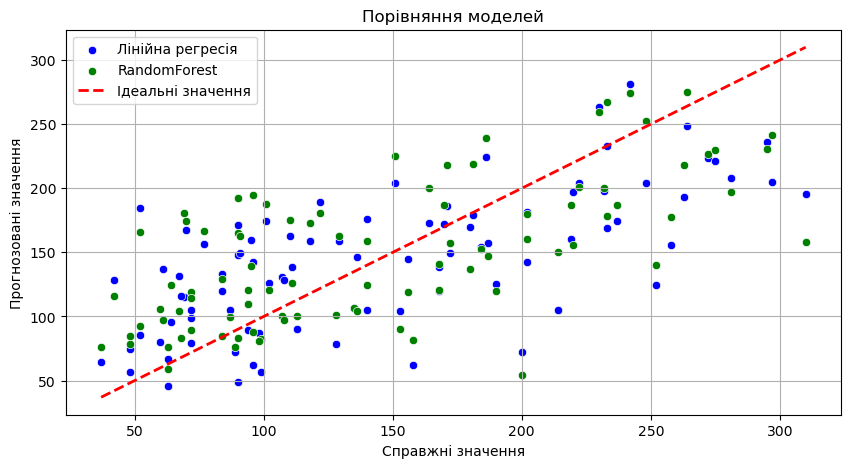

In [11]:
# 12. Вивести справжні і прогнозовані значення
print("\nЗавдання 12: Справжні і прогнозовані значення")
results_lr = pd.DataFrame({
    'Справжні': y_test,
    'Прогнозовані (Лінійна регресія)': y_pred_lr
})
results_rf = pd.DataFrame({
    'Справжні': y_test,
    'Прогнозовані (RandomForest)': y_pred_rf
})

# Відображення результатів у таблиці
print("\nРезультати Лінійної регресії:")
print(results_lr.head())

print("\nРезультати RandomForest регресії:")
print(results_rf.head())

# Відображення результатів з різними кольорами для наочності
plt.figure(figsize=(10, 5))
sns.scatterplot(x=results_lr['Справжні'], y=results_lr['Прогнозовані (Лінійна регресія)'], color='blue', label='Лінійна регресія')
sns.scatterplot(x=results_rf['Справжні'], y=results_rf['Прогнозовані (RandomForest)'], color='green', label='RandomForest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ідеальні значення')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння моделей")
plt.legend()
plt.grid(True)
plt.show()